# Data cleaning lab


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### import the data

In [2]:
iris = pd.read_csv('iris-data.csv')

In [12]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
iris.shape

(150, 5)

In [24]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

### Histogram distribution of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23173d10>,
      dtype=object)

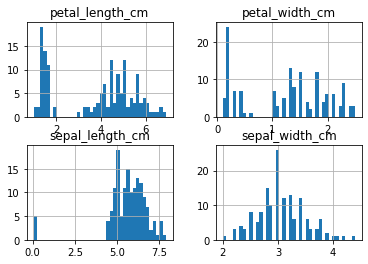

In [32]:
%matplotlib inline

iris.hist(bins=40)


#### correct the different class

In [42]:
iris["class"].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [45]:
#iris_versicolor = iris[(iris['class'] == "versicolor")]
#iris_versicolor

In [52]:
iris['class'] = iris['class'].replace({'Iris-setossa': 'Iris-setosa', 'versicolor': 'Iris-versicolor'})

#### look for weird data

In [33]:
stats = iris.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
sepal_length_cm,150.0,5.644627,1.312781,0.055,5.1,5.70,6.4,7.9,1.3
sepal_width_cm,150.0,3.054667,0.433123,2.000,2.8,3.00,3.3,4.4,0.5
petal_length_cm,150.0,3.758667,1.764420,1.000,1.6,4.35,5.1,6.9,3.5
petal_width_cm,145.0,1.236552,0.755058,0.100,0.4,1.30,1.8,2.5,1.4


In [53]:
iris_small = iris[(iris['petal_length_cm'] <= 2.1)]
iris_small.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
iris_small2 = iris[(iris['petal_width_cm'] <= 0.9)]
iris_small2.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
'''
we can see that all those different cluster are in reality part of a specific class of flower which mean those value are totaly right
I decide not to do anything with those cluster see in the histogram.

other than that those histogram are normaly distibute with length and width that could be expected for flower
there is still some outsider that we will look at later.
'''

### working with the null value

In [17]:
null_cols = iris.isnull().sum()
null_cols[null_cols > 0]

petal_width_cm    5
dtype: int64

In [55]:
null_data = iris[iris.isnull().any(axis=1)]
null_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [68]:
iris_Iris_setosa = iris[(iris['class'] == "Iris-setosa")]
iris_Iris_setosa["petal_width_cm"].mean()

iris["petal_width_cm"].fillna(0.3, inplace = True) 
# replace the missing value witht the averge of the kind of flower they are missing


### working with the duplicate

In [16]:
iris[iris.duplicated(keep=False)]

# those duplicate look like they could just be two flower with the same size, I decide not to drop them

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


### checking for outliers

In [26]:
outliers = pd.DataFrame(columns=iris.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 3
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = iris[(iris[col] < lower) | 
                   (iris[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

list_outliers= outliers['Outlier'].tolist()
list(set(outliers))

/Users/alessandro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


['class',
 'sepal_length_cm',
 'petal_width_cm',
 'petal_length_cm',
 'sepal_width_cm',
 'Outlier']

In [73]:
outliers

,Outlier,class,petal_length_cm,petal_width_cm,sepal_length_cm,sepal_width_cm
77,sepal_length_cm,Iris-versicolor,5.0,1.7,0.067,3.0
78,sepal_length_cm,Iris-versicolor,4.5,1.5,0.060,2.9
79,sepal_length_cm,Iris-versicolor,3.5,1.0,0.057,2.6
80,sepal_length_cm,Iris-versicolor,3.8,1.1,0.055,2.4
81,sepal_length_cm,Iris-versicolor,3.7,1.0,0.055,2.4


In [74]:
iris_final = iris[(iris['sepal_length_cm'] >= 0.1)]

iris_final

# becasue those five row are big outlier I decide to drop them, their is not enought of them to represent a flower category on their own

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### correlation

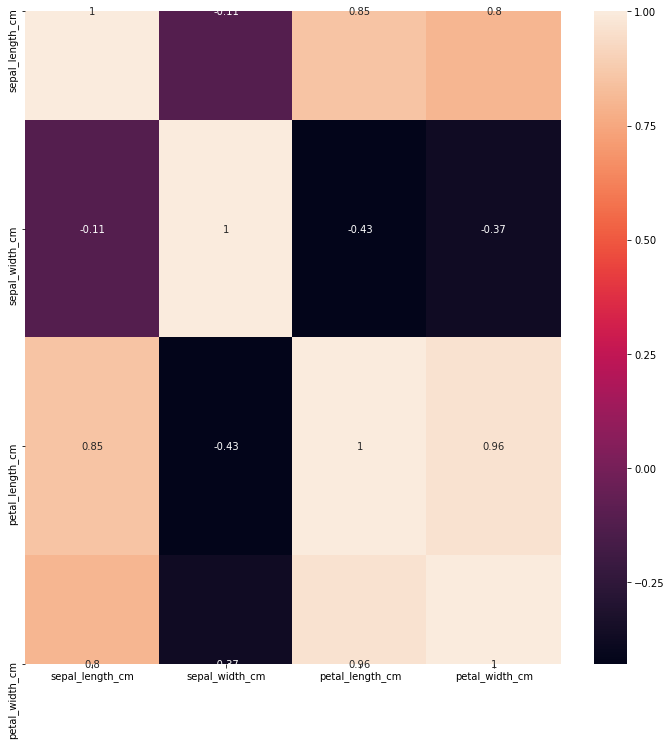

In [75]:
plt.figure(figsize=(12,12))

sns.heatmap(iris_final.corr(), annot=True)

In [ ]:
''' 
as expected we can see an high correlation with petal lenght and petal width.
but what was less expected is that there is no correlation bettween the sepal length and sepal wight
'''

In [ ]:
iris_final.to_csv("iris_clean.csv")